In [1]:
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = [15, 10]
plt.rcParams.update({'font.size': 20})

In [2]:
from data import read_count

In [3]:
df1 = read_count('data/all_saints_square-2020.csv')
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2638 entries, 0 to 2637
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        2638 non-null   datetime64[ns]
 1   person      2638 non-null   int64         
 2   bicycle     2638 non-null   int64         
 3   car         2638 non-null   int64         
 4   motorcycle  2638 non-null   int64         
 5   airplane    2638 non-null   int64         
 6   bus         2638 non-null   int64         
 7   train       2638 non-null   int64         
 8   truck       2638 non-null   int64         
 9   boat        2638 non-null   int64         
dtypes: datetime64[ns](1), int64(9)
memory usage: 206.2 KB


/home/robert/prj/py/cv/object_count/object-detection-opencv-master/data.py:41: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  dateparse = lambda x: pd.datetime.strptime(x, '%Y-%m-%d_%H-%M')


In [4]:
df1.tail()

date  person  bicycle  car  motorcycle  airplane  bus  \
2633 2020-04-19 19:00:00      13        0    0           0         0    0   
2634 2020-04-19 20:00:00       0        0    0           0         0    0   
2635 2020-04-19 21:00:00       1        0    0           0         0    0   
2636 2020-04-19 22:00:00       2        0    0           0         0    0   
2637 2020-04-19 23:00:00       0        0    0           0         0    0   

      train  truck  boat  
2633      0      0     0  
2634      0      0     0  
2635      0      0     0  
2636      0      0     0  
2637      0      0     0

## Differences between YOLO and YOLO-tiled method

In [14]:
def find_diff(camera_location, feature, bins, xrange):
    df = pd.DataFrame()
    for y in range(2016, 2021):
        df_one = read_count(f'data/{camera_location}-{y}.csv')
        df_one = df_one[['date', feature]]
        
        df_tiled = read_count(f'data/{camera_location}-{y}-split6.csv')
        df_tiled = df_tiled[['date', feature]]
        
        df_year = pd.merge(df_one, df_tiled, left_on='date', right_on='date', 
                          suffixes=('', '_tiled'))
        df_year['diff'] = df_year[feature + '_tiled'] - df_year[feature]
        #df_f.plot(df_f.date, df_f.person);
        
        df = df.append(df_year)
        
    df = df.reset_index() 
    
    mean_diff = df['diff'].mean()
    print('Mean difference', mean_diff)
    m = df.loc[df['diff'].idxmax()]
    print('Max. difference', m['diff'], '\t', m['date'])
    m = df.loc[df['diff'].idxmin()]
    print('Max. difference', m['diff'], '\t', m['date'])
    m = df.loc[df['person_tiled'].idxmax()]
    print('Max. persons', m['person_tiled'], '\t', m['date'])
    one = df['person'].sum()
    tiled = df['person_tiled'].sum()
    m = (tiled-one) / one * 100.
    print(f'Tiled method detected {m:.2f}% more persons. {one} vs. {tiled}')
    
    ax = df['diff'].hist(bins=bins, range=xrange); 
    plt.axvline(x=mean_diff, color='red', linestyle='dotted', linewidth=2);
    ax.set_xlabel('Difference in detected number of pedestrians')
    ax.set_ylabel('Count')
    #print(ax.get_ylim())
    ax.annotate(f'mean = {mean_diff:.2f}', xy=(mean_diff*1.1, ax.get_ylim()[1]*0.6))
    plt.savefig(f'figure/{camera_location}-difference-{feature}.png')
    
    return df

Mean difference 5.699976327158668
Max. difference 50 	 2019-11-17 15:00:00
Max. difference -12 	 2016-10-29 00:00:00
Max. persons 80 	 2019-11-17 15:00:00
Tiled method detected 52.13% more persons. 369497 vs. 562122


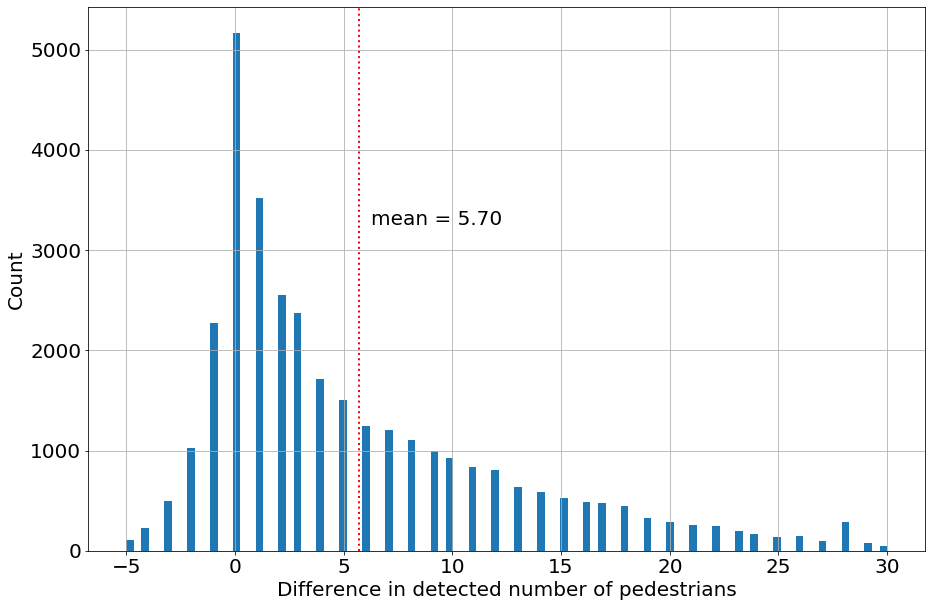

In [15]:
df_diff = find_diff('all_saints_square', 'person', bins=100, xrange=[-5, 30])

Mean difference 4.431899588526094
Max. difference 49 	 2019-08-15 14:00:00
Max. difference -5 	 2019-07-02 09:00:00
Max. persons 58 	 2019-05-04 14:00:00
Tiled method detected 173.00% more persons. 86538 vs. 236252


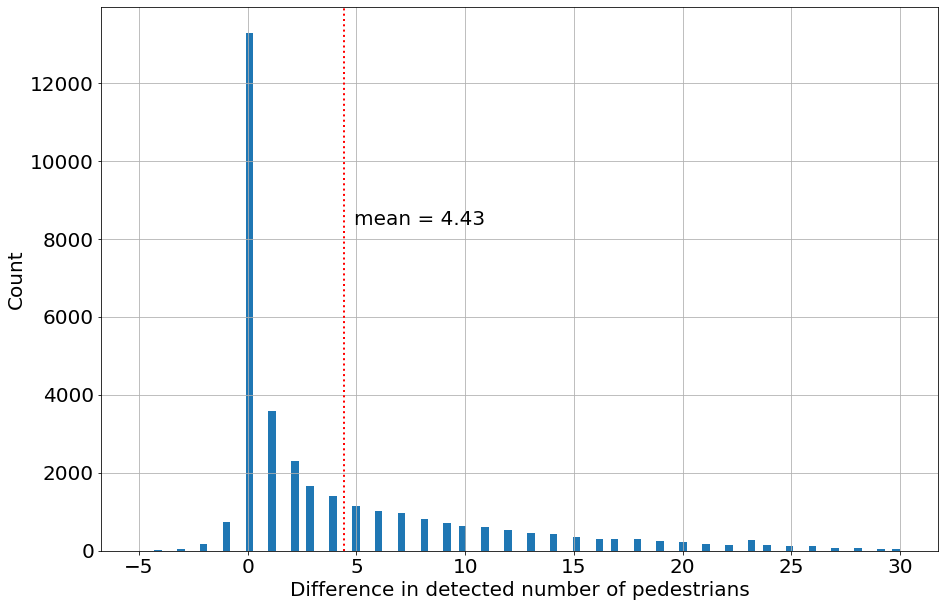

In [16]:
df_diff = find_diff('grodzka', 'person', bins=100, xrange=[-5, 30])

Mean difference 0.36423115637397124
Max. difference 15 	 2016-09-28 14:00:00
Max. difference -12 	 2018-09-02 17:00:00
Max. persons 16 	 2019-03-24 16:00:00
Tiled method detected 302.73% more persons. 4064 vs. 16367


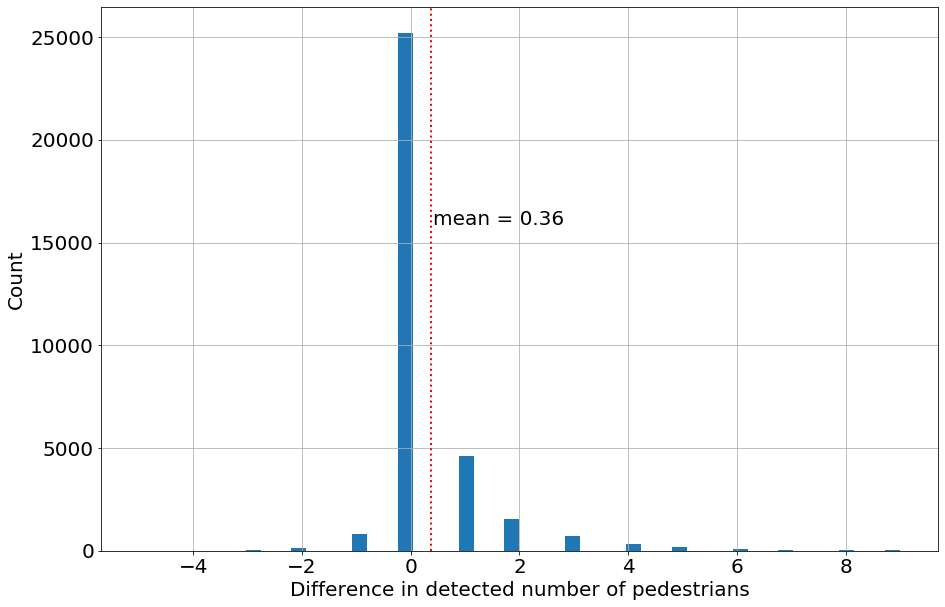

In [17]:
df_diff = find_diff('wawel', 'person', bins=50, xrange=[-5, 9])

Mean difference 0.32881376002842
Max. difference 24 	 2019-08-13 16:00:00
Max. difference -7 	 2016-10-18 12:00:00
Max. persons 34 	 2019-08-13 16:00:00
Tiled method detected 62.96% more persons. 17642 vs. 28749


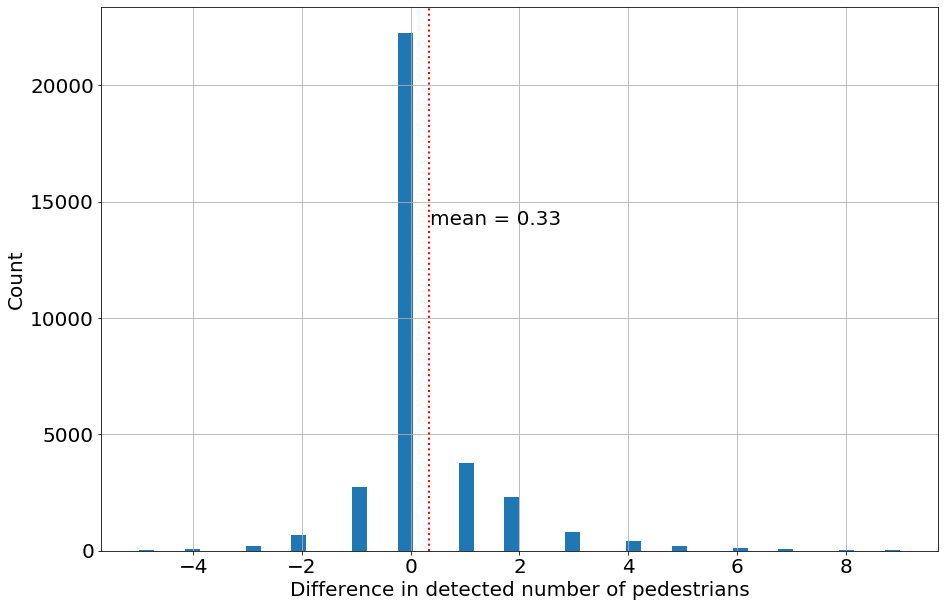

In [18]:
df_diff = find_diff('podgorze_market_square', 'person', bins=50, xrange=[-5,9])